In [1]:
#!pip install chart_studio

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chart_studio.plotly import plot, iplot
import cufflinks as cf
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_excel('Flight_Data_train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Automated EDA

In [4]:
#!pip install ydata-profiling

In [5]:
import ydata_profiling as pf

In [6]:
pf.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Manual EDA

In [7]:
df.shape

(10683, 11)

In [8]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
df.dropna(how='any', inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Feature Engineering

In [12]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


Let's convert Date_of_Journey from object to datetime

### Date_of_Journey

In [13]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], dayfirst=True)
df['Day_of_Journey'] = df['Date_of_Journey'].dt.day
df['Month_of_Journey'] = df['Date_of_Journey'].dt.month

Let's do the same for relative columns

### Dep_Time

In [14]:
df['dep_hr'] = pd.to_datetime(df['Dep_Time'],format=('%H:%M')).dt.hour
df['dep_min'] = pd.to_datetime(df['Dep_Time'],format=('%H:%M')).dt.minute

In [15]:
df.drop('Dep_Time', axis=1, inplace=True)

### Arrival_Time

In [16]:
df['Arrival_hr'] = pd.to_datetime(df['Arrival_Time'], format='mixed', dayfirst=True).dt.hour
df['Arrival_min'] = pd.to_datetime(df['Arrival_Time'], format='mixed', dayfirst=True).dt.minute

In [17]:
df.drop('Arrival_Time', axis=1, inplace=True)

### Duration

In [18]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,dep_hr,dep_min,Arrival_hr,Arrival_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25


In [19]:
duration = df['Duration'].str.split(' ', expand=True)
duration.head()

,0,1
0,2h,50m
1,7h,25m
2,19h,None
3,5h,25m
4,4h,45m


In [20]:
duration[1].fillna('00m',inplace=True) 

In [21]:
df['duration_hr'] = duration[0].apply(lambda x: x[:-1]) # to omit h being selected as well
df['duration_min'] = duration[1].apply(lambda x: x[:-1]) #to omit m being selected as well

### Count of Airlines

In [22]:
df.Airline.value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

### Airline vs Price

In [23]:
airlines = df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
airlines

Airline
Jet Airways Business                 58358.666667
Jet Airways                          11643.923357
Multiple carriers Premium economy    11418.846154
Multiple carriers                    10902.678094
Air India                             9612.427756
Vistara Premium economy               8962.333333
Vistara                               7796.348643
GoAir                                 5861.056701
IndiGo                                5673.682903
Air Asia                              5590.260188
SpiceJet                              4338.284841
Trujet                                4140.000000
Name: Price, dtype: float64

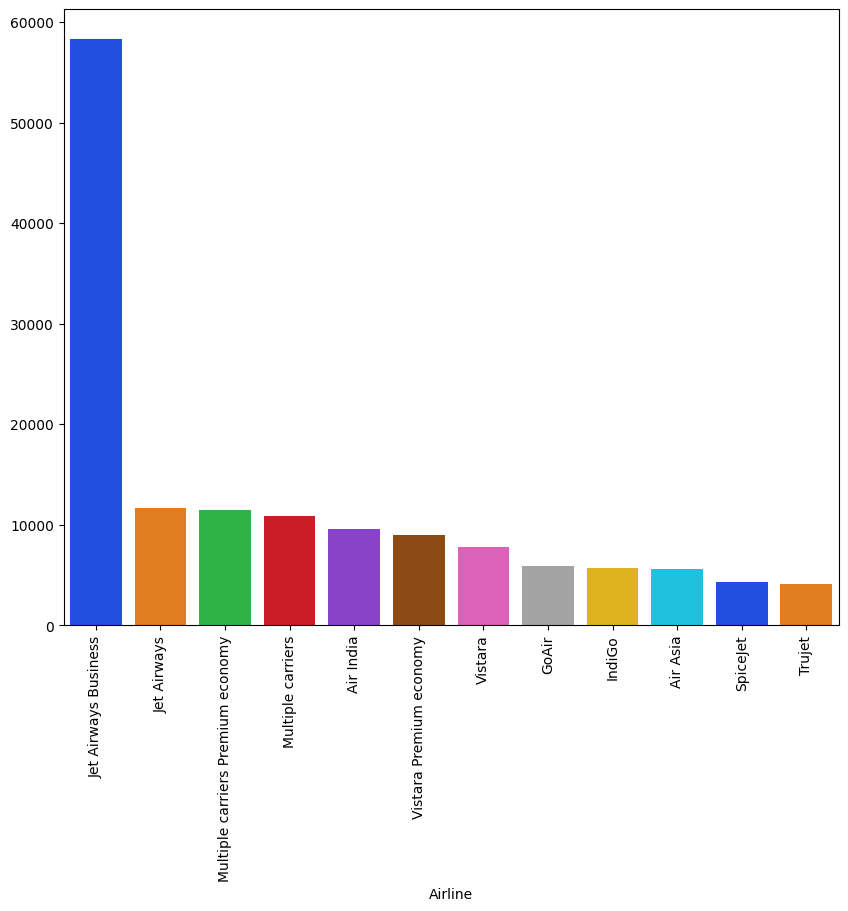

In [24]:
plt.figure(figsize=(10,8))
sns.barplot(x=airlines.index, y=airlines.values, palette='bright')
plt.xticks(rotation=90)
plt.show()

### Price based Number of Stops

In [25]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,dep_hr,dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,00


In [26]:
df.groupby(['Airline', 'Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

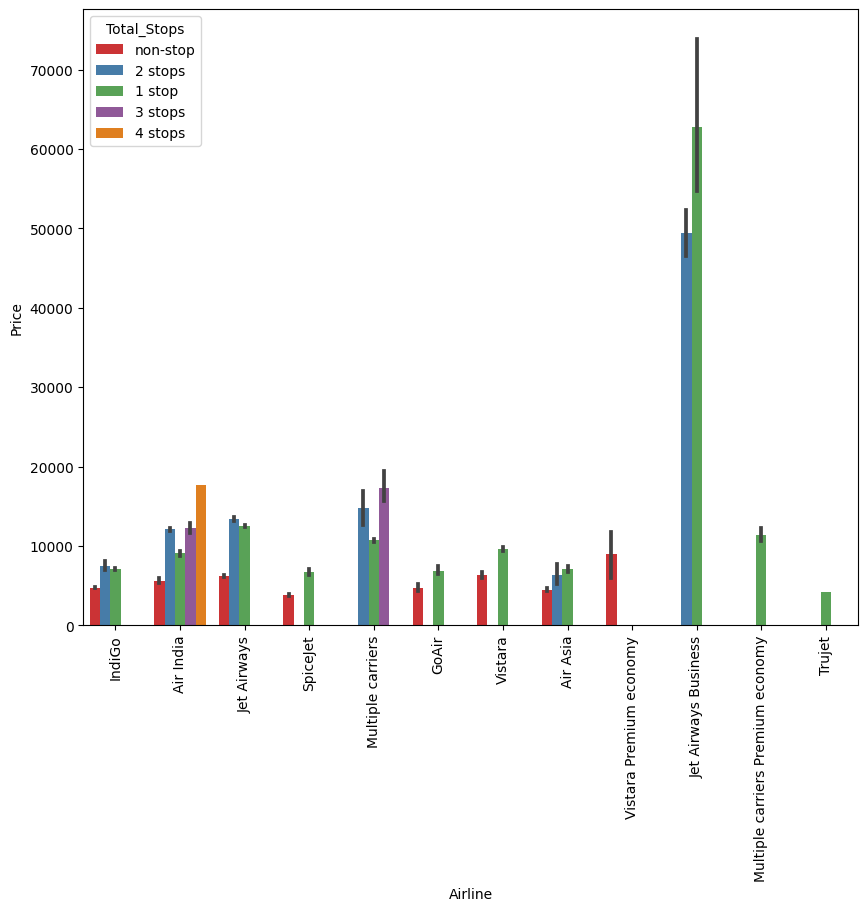

In [27]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['Airline'], y=df['Price'], hue=df['Total_Stops'], palette='Set1')
plt.xticks(rotation=90)
plt.show()

In [28]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,dep_hr,dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,00
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [29]:
df.Source.value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

### Source vs Price

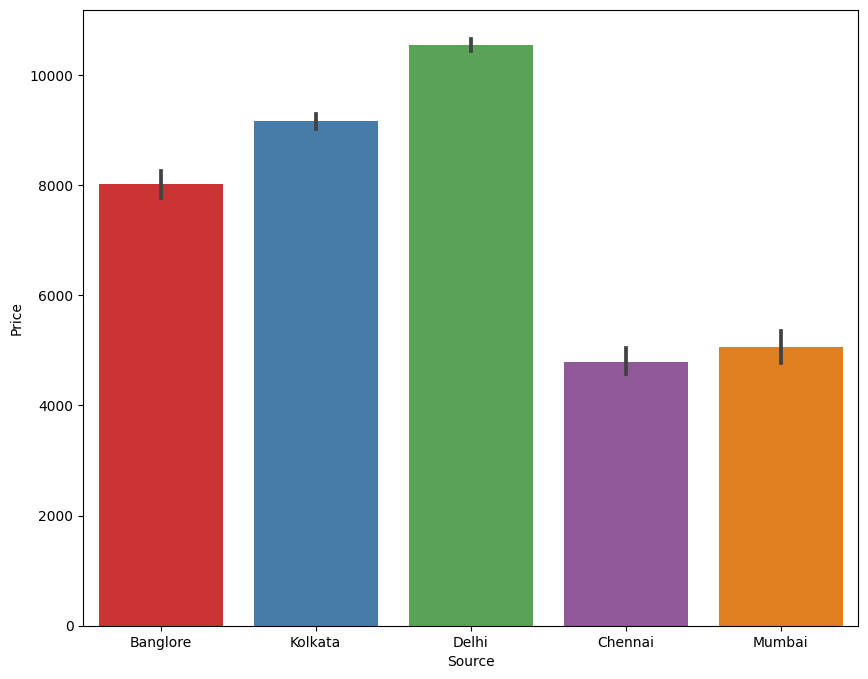

In [30]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['Source'], y=df['Price'], palette='Set1')
plt.show()

### Destination vs Price

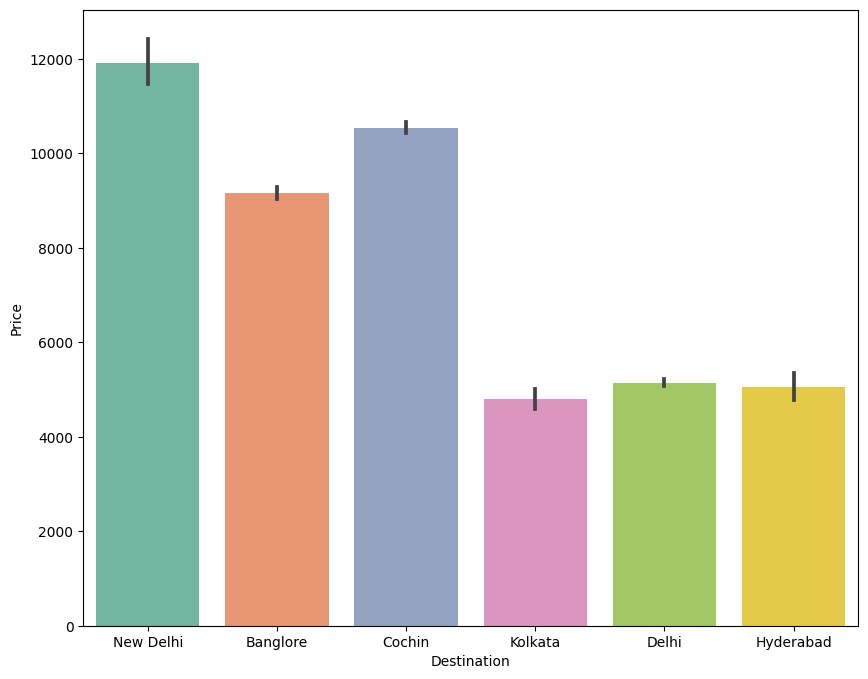

In [31]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['Destination'], y=df['Price'], palette='Set2')
plt.show()

As you can see there is New Delhi as well as Delhi which infact represent the same thing thus;

In [32]:
for i in df:
    df.replace('New Delhi', 'Delhi', inplace=True)

In [33]:
df.Destination.value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

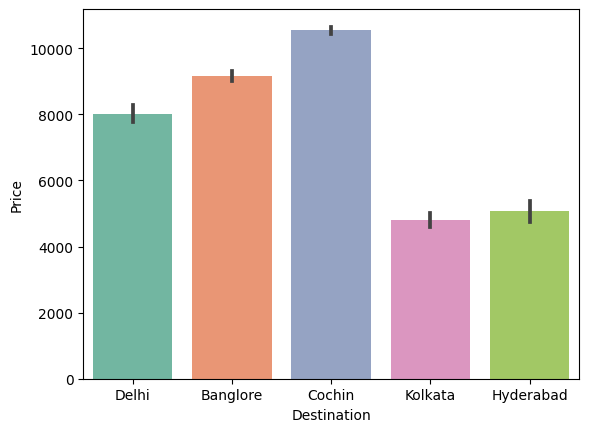

In [34]:
sns.barplot(x=df['Destination'], y=df['Price'], palette='Set2')
plt.show()

### One hot encoding

In [35]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,dep_hr,dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,00


In [36]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

In [37]:
df['Total_Stops'] = df['Total_Stops'].astype(int)

In [38]:
dummy_airline = pd.get_dummies(df['Airline'], drop_first=True, dtype=int)
dummies = pd.get_dummies(df[['Source', 'Destination']], drop_first=True, dtype=int)
df = pd.concat([dummy_airline, dummies, df], axis=1)

In [39]:
df.drop(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Additional_Info', 'Date_of_Journey'], axis=1, inplace=True)

In [40]:
pd.set_option('display.max_columns', None)
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Total_Stops,Price,Day_of_Journey,Month_of_Journey,dep_hr,dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,7662,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,2,13882,9,6,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,6218,12,5,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,13302,1,3,16,50,21,35,4,45


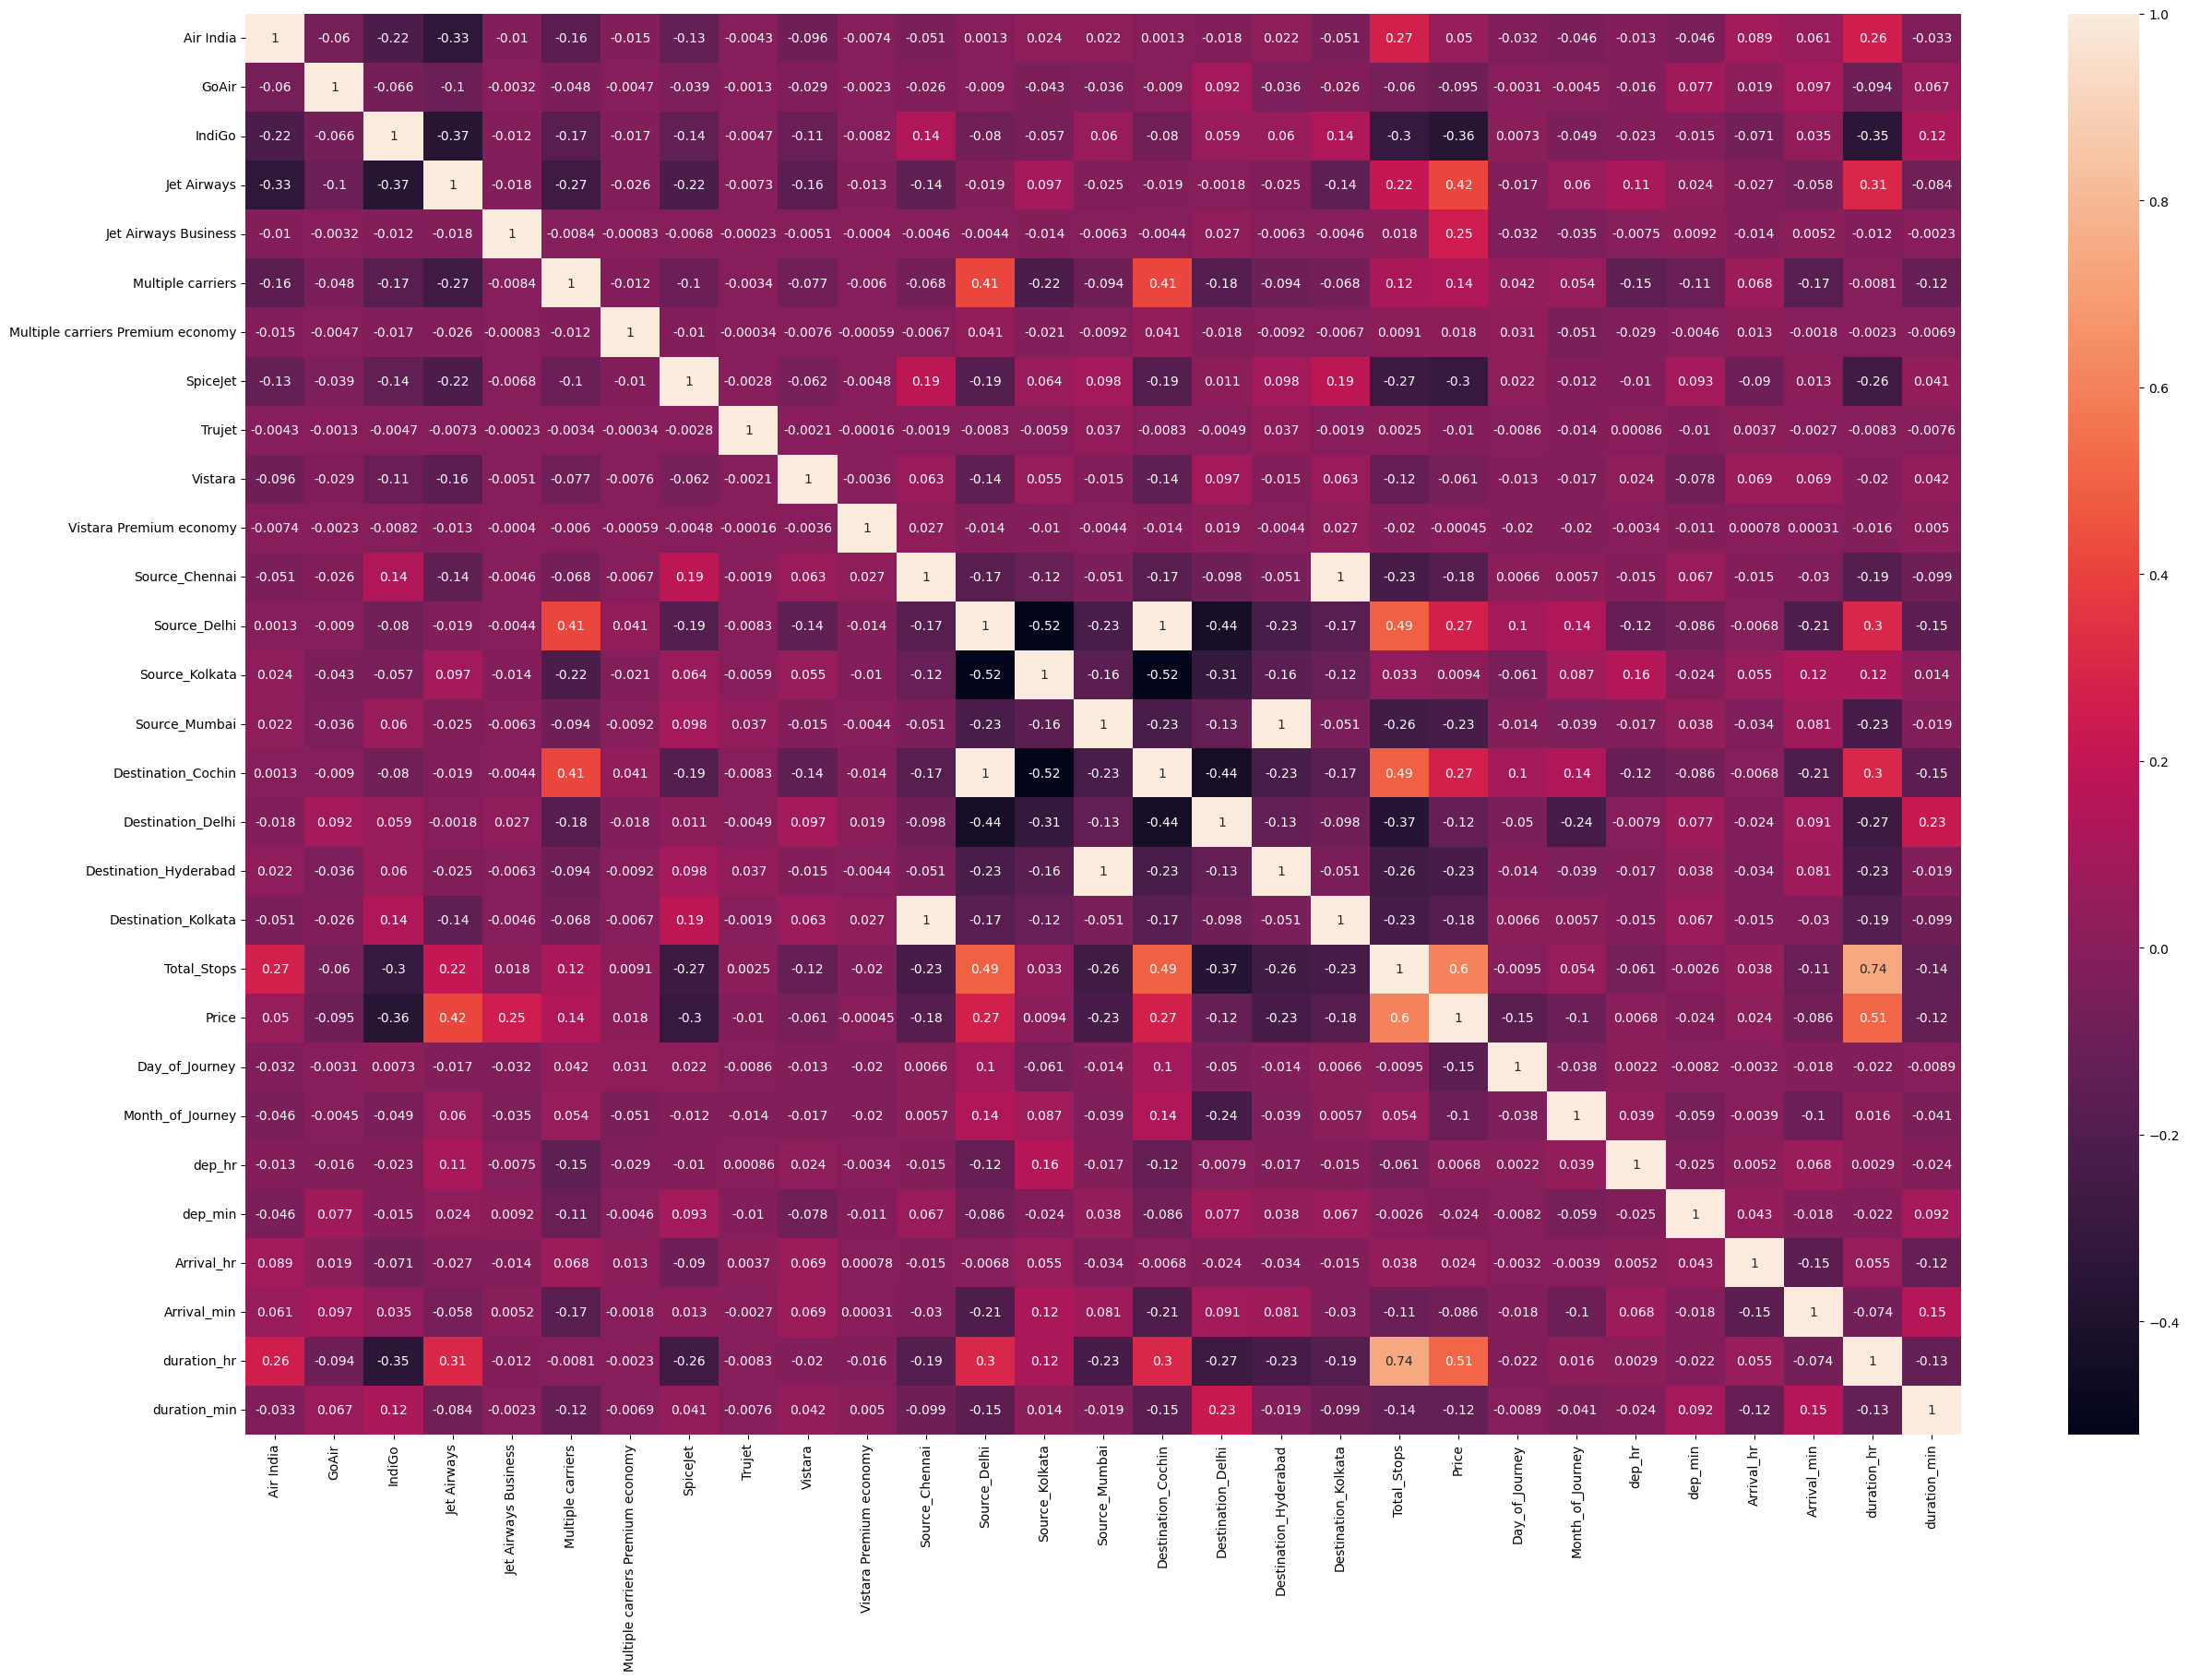

In [41]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Test_data

**We have to do same data cleaning for testing data as well**

In [42]:
df_test = pd.read_excel('Flight_Test_set.xlsx')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [43]:
df_test.Total_Stops.unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [44]:
df_test.shape

(2671, 10)

In [45]:
df_test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [46]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [47]:
# Date of Journey
df_test['Date_of_Journey'] = pd.to_datetime(df_test['Date_of_Journey'], dayfirst=True)
df_test['Day_of_Journey'] = df_test['Date_of_Journey'].dt.day
df_test['Month_of_Journey'] = df_test['Date_of_Journey'].dt.month

#Dep_Time
df_test['dep_hr'] = pd.to_datetime(df_test['Dep_Time'],format=('%H:%M')).dt.hour
df_test['dep_min'] = pd.to_datetime(df_test['Dep_Time'],format=('%H:%M')).dt.minute
df_test.drop('Dep_Time', axis=1, inplace=True)

#Arrival_Time
df_test['Arrival_hr'] = pd.to_datetime(df_test['Arrival_Time'], format='mixed', dayfirst=True).dt.hour
df_test['Arrival_min'] = pd.to_datetime(df_test['Arrival_Time'], format='mixed', dayfirst=True).dt.minute
df_test.drop('Arrival_Time', axis=1, inplace=True)

#Duration
duration = df_test['Duration'].str.split(' ', expand=True)
duration[1].fillna('00m',inplace=True)
df_test['duration_hr'] = duration[0].apply(lambda x: x[:-1]) # to omit h being selected as well
df_test['duration_min'] = duration[1].apply(lambda x: x[:-1]) #to omit m being selected as well

for i in df_test:
    df_test.replace('New Delhi', 'Delhi', inplace=True)

#Total_Stops
df_test['Total_Stops']=df_test['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})
df_test['Total_Stops'] = df_test.Total_Stops.astype(int)

#Airline
dummy_airline = pd.get_dummies(df_test['Airline'], drop_first=True, dtype=int)
dummies = pd.get_dummies(df_test[['Source', 'Destination']], drop_first=True, dtype=int)
df_test = pd.concat([dummy_airline, dummies, df_test], axis=1)

df_test.drop(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Additional_Info', 'Date_of_Journey'], axis=1, inplace=True)

In [48]:
pd.set_option('display.max_columns', None)
df_test.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Total_Stops,Day_of_Journey,Month_of_Journey,dep_hr,dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,6,6,17,30,4,25,10,55
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,12,5,6,20,10,20,4,00
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,21,5,19,15,19,0,23,45
3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,21,5,8,0,21,0,13,00
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,24,6,23,55,2,45,2,50


In [49]:
print('train_shape',df.shape)
print('test_shape',df_test.shape)

train_shape (10682, 29)
test_shape (2671, 27)


In [50]:
x = df.drop('Price', axis=1)
y = df.Price

In [51]:
x.head(3)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Total_Stops,Day_of_Journey,Month_of_Journey,dep_hr,dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,2,9,6,9,25,4,25,19,00


# Model Building and Hyperparameter tuning

In [52]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=1)

### ExtraTreesRegressor

In [53]:
from sklearn.ensemble import ExtraTreesRegressor

In [54]:
etr = ExtraTreesRegressor(n_estimators=120)

In [55]:
etr.fit(x_train,y_train)

ExtraTreesRegressor(n_estimators=120)

In [56]:
yhat_etr = etr.predict(x_val)

In [57]:
from sklearn.metrics import r2_score

In [58]:
r2_score(y_val, yhat_etr)

0.7809388185791252

### RandomForestRegressor

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [61]:
yhat_rfr = rfr.predict(x_val)

In [62]:
r2_score(y_val, yhat_rfr)

0.8092286208575684

##### Hyperparameter Tuning

In [63]:
from sklearn.model_selection import RandomizedSearchCV

In [64]:
n_estimators = [int(x) for x in np.linspace(start=50, stop=1500, num=10)]
max_depth = [int(x) for x in np.linspace(6, 45, 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
max_features = ['sqrt', 'log2']

param_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'max_features': max_features}

rf = RandomForestRegressor()
rscv = RandomizedSearchCV(estimator= rf, param_distributions = param_grid, n_iter = 10, scoring='neg_mean_squared_error', n_jobs= 1, cv=3, random_state=1)


In [65]:
rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [50, 211, 372, 533, 694,
                                                         855, 1016, 1177, 1338,
                                                         1500]},
                   random_state=1, scoring='neg_mean_squared_error')

In [66]:
print('Best cross-validation score: ',rscv.best_score_)
print('Best Parameters: ', rscv.best_params_)
print('Accuracy score: ', rscv.score(x_val,y_val))

Best cross-validation score:  -4857781.288910787
Best Parameters:  {'n_estimators': 1500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 45}
Accuracy score:  -3686018.6764470213


In [67]:
new_rfr = RandomForestRegressor(n_estimators= 1500, min_samples_split= 5, min_samples_leaf= 2, max_features = 'sqrt', max_depth= 45)

In [68]:
new_rfr.fit(x_train,y_train)
new_rfr.score(x_val, y_val)

0.8140334895580409

In [69]:
yhat_new_rfr = new_rfr.predict(x_val)

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MAE: ', mean_absolute_error(y_val, yhat_new_rfr))
print('MSE: ', mean_squared_error(y_val, yhat_new_rfr))

MAE:  1261.6190996105456
MSE:  3677860.6407955787


### CatboostRegressor

In [71]:
from catboost import CatBoostRegressor

In [72]:
cat=CatBoostRegressor()
cat.fit(x_train,y_train)

Learning rate set to 0.056264
0:	learn: 4518.9487555	total: 176ms	remaining: 2m 55s
1:	learn: 4385.7530356	total: 181ms	remaining: 1m 30s
2:	learn: 4255.0758302	total: 186ms	remaining: 1m 1s
3:	learn: 4121.3170673	total: 191ms	remaining: 47.7s
4:	learn: 4016.4915503	total: 197ms	remaining: 39.2s
5:	learn: 3915.0464614	total: 201ms	remaining: 33.3s
6:	learn: 3802.7615551	total: 205ms	remaining: 29.1s
7:	learn: 3721.8559077	total: 210ms	remaining: 26s
8:	learn: 3630.0842259	total: 214ms	remaining: 23.5s
9:	learn: 3539.1629597	total: 217ms	remaining: 21.5s
10:	learn: 3476.7020491	total: 221ms	remaining: 19.9s
11:	learn: 3397.3804053	total: 225ms	remaining: 18.5s
12:	learn: 3327.7742620	total: 228ms	remaining: 17.3s
13:	learn: 3272.0203497	total: 232ms	remaining: 16.3s
14:	learn: 3204.4422810	total: 235ms	remaining: 15.5s
15:	learn: 3148.2553917	total: 239ms	remaining: 14.7s
16:	learn: 3108.1699743	total: 243ms	remaining: 14s
17:	learn: 3065.5686984	total: 246ms	remaining: 13.4s
18:	learn:

In [73]:
yhat_cat = cat.predict(x_val)

In [74]:
r2_score(y_val,yhat_cat)

0.8416780348848041

### LGBMRegressor (lightgbm)

In [75]:
!pip install lightgbm

In [76]:
from lightgbm import LGBMRegressor

In [77]:
lgbm = LGBMRegressor()

In [78]:
x_train.dtypes

Air India                             int32
GoAir                                 int32
IndiGo                                int32
Jet Airways                           int32
Jet Airways Business                  int32
Multiple carriers                     int32
Multiple carriers Premium economy     int32
SpiceJet                              int32
Trujet                                int32
Vistara                               int32
Vistara Premium economy               int32
Source_Chennai                        int32
Source_Delhi                          int32
Source_Kolkata                        int32
Source_Mumbai                         int32
Destination_Cochin                    int32
Destination_Delhi                     int32
Destination_Hyderabad                 int32
Destination_Kolkata                   int32
Total_Stops                           int32
Day_of_Journey                        int32
Month_of_Journey                      int32
dep_hr                          

In [79]:
x_train['duration_hr'] = x_train['duration_hr'].astype(int)
x_train['duration_min'] = x_train['duration_min'].astype(int)

x_val['duration_hr'] = x_val['duration_hr'].astype(int)
x_val['duration_min'] = x_val['duration_min'].astype(int)

In [80]:
lgbm.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 176
[LightGBM] [Info] Number of data points in the train set: 7477, number of used features: 24
[LightGBM] [Info] Start training from score 9096.857429


LGBMRegressor()

In [81]:
yhat_lgbm = lgbm.predict(x_val)

In [82]:
r2_score(y_val, yhat_lgbm)

0.8310589833644689

### XGBRegressor

In [83]:
from xgboost import XGBRegressor

In [84]:
xgbr = XGBRegressor()
xgbr.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [85]:
yhat_xgbr = xgbr.predict(x_val)

In [86]:
r2_score(y_val, yhat_xgbr)

0.830153332293819

**So the best model is CatBoostRegressor with r2_score of 0.84**

# Saving the model

In [87]:
import pickle
import gzip

def save_zipped_pickle(obj, filename, protocol=-1):
    with gzip.open(filename,'wb') as f:
        pickle.dump(obj, f, protocol)

In [88]:
save_zipped_pickle(cat, 'cat_model.pkl')

In [89]:
def load_zipped_pickle(filename):
    with gzip.open(filename, 'rb') as f:
        loaded_object = pickle.load(f)
        return loaded_object

In [90]:
model= load_zipped_pickle('cat_model.pkl')

In [91]:
model.score(x_val,y_val)

0.8416780348848041

# Exporting CSV files

In [92]:
df.shape

(10682, 29)

In [93]:
df.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Total_Stops', 'Price', 'Day_of_Journey', 'Month_of_Journey', 'dep_hr',
       'dep_min', 'Arrival_hr', 'Arrival_min', 'duration_hr', 'duration_min'],
      dtype='object')

In [94]:
df.to_csv('deploy_df.csv')